# Time series analysis

In this notebook we will see examples of time series data and how to analyze it. Time series analysis is about finding patterns in chronologically ordered data. 

Let us start by looking at an example of loading in time series data and making a simple time series plot. The example will be with Google Trends data, more specific the search term "icecream" in the United States in the past 5 years. The data is in the folder and can be loaded into thin notebook in the following way (the data comes with two rows of heads information that we do not want to load in):

In [1]:
GT_icecream <- read.csv("Google_Trend_icecream_us_2018-10-16.csv", skip = 2)

In [2]:
str(GT_icecream)
head(GT_icecream)

'data.frame':	261 obs. of  2 variables:
 $ Week                     : Factor w/ 261 levels "2013-10-20","2013-10-27",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ icecream...United.States.: int  35 30 30 30 33 33 28 30 29 28 ...


Week,icecream...United.States.
2013-10-20,35
2013-10-27,30
2013-11-03,30
2013-11-10,30
2013-11-17,33
2013-11-24,33


The data seems to be loaded in correctly, however, there are a few things we need to correct. First of all, the column name of the second column seems a bit weird. We want to correct that. The `names` function in R can both be used to get the column names of a dataframe as well as assigning new names to the columns:

In [3]:
names(GT_icecream)

[1] "Week"                      "icecream...United.States."

In [4]:
names(GT_icecream) <- c("Week", "icecream")

In [5]:
names(GT_icecream)

[1] "Week"     "icecream"

In [6]:
head(GT_icecream)

Week,icecream
2013-10-20,35
2013-10-27,30
2013-11-03,30
2013-11-10,30
2013-11-17,33
2013-11-24,33


Furthermore, as we saw when applying the `str` function to the data, the time column, in this case `Week`, is loaded in as factors. Note that a week is here denoted by the Sunday (all the dates are Sundays). Note also that, while a week is usually started on Monday in most countries, in the United States, Sunday is often considered the first day of the week. So from this data, it is a bit hard to figure out exactly what week a given date represent. We will however ignore this here.

We will use the `lubridate` package to fix the week dates here. (For more on the `lubridate` package, see [Chapter 16](http://r4ds.had.co.nz/dates-and-times.html) of [R for Data Science](http://r4ds.had.co.nz/) by Garrett Grolemund and Hadley Wickham.) Basically, the `lubridate` package have numerous functions that can be used to turn strings into proper dates. For instance, the function `ymd` (year-month-date) takes string of the form `2018-10-17` and turn it into date format in R.

In [7]:
library(lubridate)
GT_icecream$Week <- ymd(GT_icecream$Week)


Attaching package: 'lubridate'

The following object is masked from 'package:base':

    date



As we can see this have turned the factor variable `Week` into a proper date form:

In [8]:
str(GT_icecream)

'data.frame':	261 obs. of  2 variables:
 $ Week    : Date, format: "2013-10-20" "2013-10-27" ...
 $ icecream: int  35 30 30 30 33 33 28 30 29 28 ...


We can now use `ggplot2` to plot the time series data.

In [9]:
library(tidyverse)
options(repr.plot.width=8, repr.plot.height=6)

Warning message:
"package 'tidyverse' was built under R version 3.6.3"-- Attaching packages --------------------------------------- tidyverse 1.3.0 --
v ggplot2 3.3.2     v purrr   0.3.4
v tibble  3.0.3     v dplyr   1.0.2
v tidyr   1.1.2     v stringr 1.4.0
v readr   1.3.1     v forcats 0.4.0
Warning message:
"package 'ggplot2' was built under R version 3.6.3"Warning message:
"package 'tibble' was built under R version 3.6.3"Warning message:
"package 'tidyr' was built under R version 3.6.3"Warning message:
"package 'purrr' was built under R version 3.6.3"Warning message:
"package 'dplyr' was built under R version 3.6.3"-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x lubridate::as.difftime() masks base::as.difftime()
x lubridate::date()        masks base::date()
x dplyr::filter()          masks stats::filter()
x lubridate::intersect()   masks base::intersect()
x dplyr::lag()             masks stats::lag()
x lubridate::setdiff()     masks base::setdiff

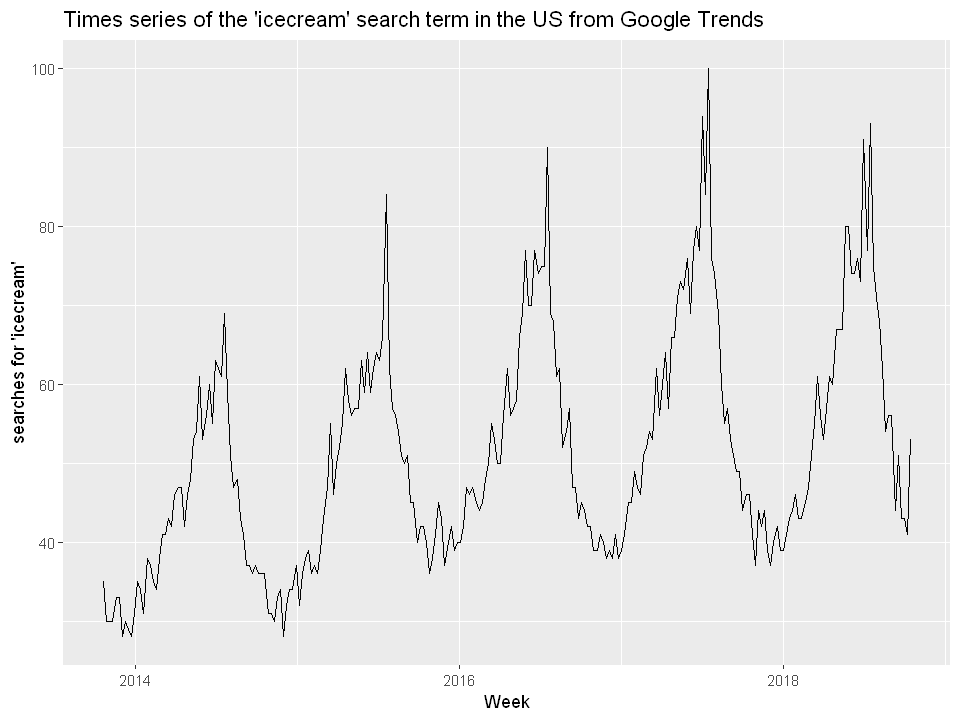

In [10]:
ggplot(data = GT_icecream) + geom_line(aes(x = Week, y = icecream)) +
    ggtitle("Times series of the 'icecream' search term in the US from Google Trends") +
    ylab("searches for 'icecream'")

### Exercise

1. Load in, fix, and plot the time series for weekly searches in the last 5 years in the US for the search term 'AI'. (The data is available in the csv file "Google_Trends_ai_us_2018-10-16.csv".)
2. What kind of seasonality and trend do you see in the plot for the search term 'AI'? Can you explain what you see?
3. Load in, fix, and plot the time series for daily searches in the last 30 days in DK for the search term 'taxa'. (The data is available in the csv file "Google_Trend_taxa_dk_2018-10-16.csv".)
4. What kind of seasonality and trend do you see in the plot for the search term 'taxa'? Can you explain what you see?
5. From the book [Introduction to R for Business Intelligence](http://jgendron.github.io/com.packtpub.intro.r.bi/) by Jay Gendron, load in, fix, and plot ridership levels data. The url to pass to `read.csv` is the following:
https://raw.githubusercontent.com/jgendron/com.packtpub.intro.r.bi/master/Chapter6-TimeSeriesAnalysis/data/Ch6_ridership_data_2011-2012.csv
6. What kind of seasonality and trend do you see in the ridership data? Can you explain what you see?

## Using linear regression to analyze time series data

Time series data is almost never linear in development or even close, however, sometimes linear regression can be used.

We will use another data set as example here, namely the airpass data set from the TSA package. This data contains monthly passenger numbers in the period from January 1960 to December 1971. By monthly data, we mean that every data point (row) corresponds to a calendar month.

Let us load in the data and have a brief look at it:

In [16]:
install.packages("TSA")

also installing the dependencies 'quadprog', 'leaps', 'locfit', 'tseries'



package 'quadprog' successfully unpacked and MD5 sums checked
package 'leaps' successfully unpacked and MD5 sums checked
package 'locfit' successfully unpacked and MD5 sums checked
package 'tseries' successfully unpacked and MD5 sums checked
package 'TSA' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\MaZeeT\AppData\Local\Temp\Rtmpw3gSvN\downloaded_packages


In [17]:
library(TSA)
data(airpass)

Warning message:
"package 'TSA' was built under R version 3.6.3"
Attaching package: 'TSA'

The following object is masked from 'package:readr':

    spec

The following objects are masked from 'package:stats':

    acf, arima

The following object is masked from 'package:utils':

    tar



In [18]:
str(airpass)
summary(airpass)

 Time-Series [1:144] from 1960 to 1972: 112 118 132 129 121 135 148 148 136 119 ...


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  104.0   180.0   265.5   280.3   360.5   622.0 

Note how the output of the `str` function looks. It looks like this because the `airpass` dataset is loaded into R in as a special time series class.

We can also get a grip of the data by plotting the time series. In fact, any time series object can be plotted very easily using the `plot` function:

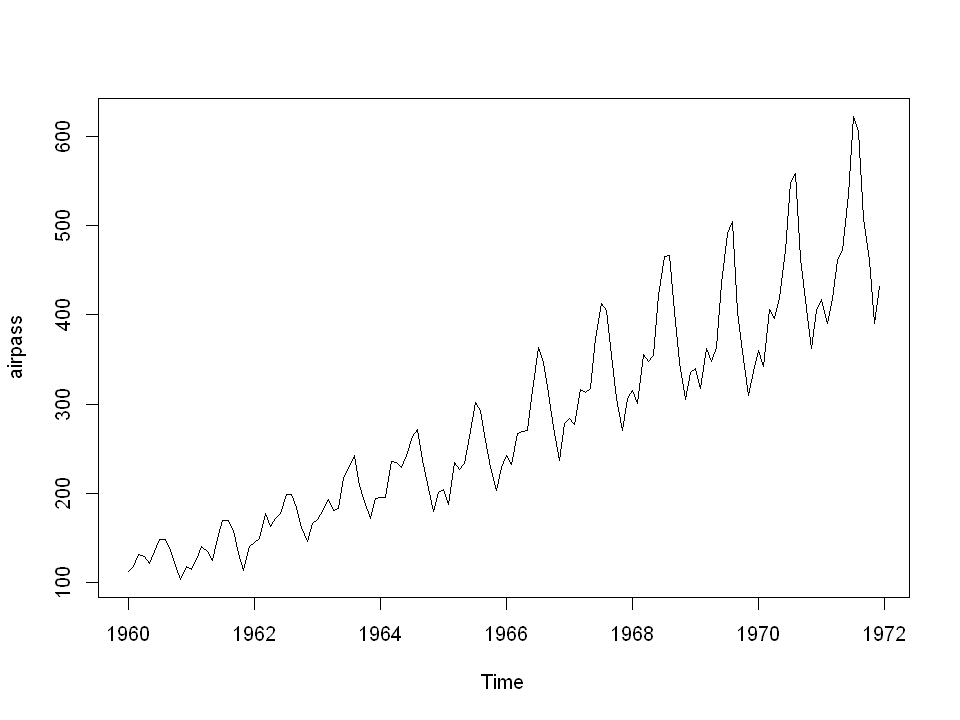

In [19]:
plot(airpass)

From this plot it is clear that there is some periodic patterns we cannot hope to catch with linear regression. We might be able to catch the linear trend though.

To prepare the data for linear regression we first turn it into a data frame. Getting the passenger volume numbers out of the time series object is easy.

In [20]:
volume <- as.matrix(airpass)
head(volume)

112
118
132
129
121
135


Getting the time stamp out of the time series object is not hard either, but the returned numbers do look a little weird at first glance.

In [21]:
time <- as.matrix(time(airpass))
head(time)

1960.000
1960.083
1960.167
1960.250
1960.333
1960.417


Here the decimal represent the fact that there are twelve month in between each change in year.

We can now put it all into a data frame. (The first "volume" in the call to `data.frame` represent the fact that we name the column "volume", while the second "volume" represent that we assign the values to the column from the variable we just named `volume`.

In [26]:
airpass_df <- data.frame(volume = volume, time = time)
head(airpass_df)

volume,time
112,1960.000
118,1960.083
132,1960.167
129,1960.250
121,1960.333
135,1960.417


Let us now try to build a linear regression model for it:

In [27]:
lmfit <- lm(volume ~ time, data = airpass_df)
summary(lmfit)


Call:
lm(formula = volume ~ time, data = airpass_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-93.858 -30.727  -5.757  24.489 164.999 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -62406.656   2178.265  -28.65   <2e-16 ***
time            31.886      1.108   28.78   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 46.06 on 142 degrees of freedom
Multiple R-squared:  0.8536,	Adjusted R-squared:  0.8526 
F-statistic: 828.2 on 1 and 142 DF,  p-value: < 2.2e-16


Note how all the relevant statistics look good such as the overall and individual p-values and the R-squared. However, when we plot the linear model, we see how it managed to capture the trend to some extent, but the seasonal cyclic patterns is completely missed by the linear model.

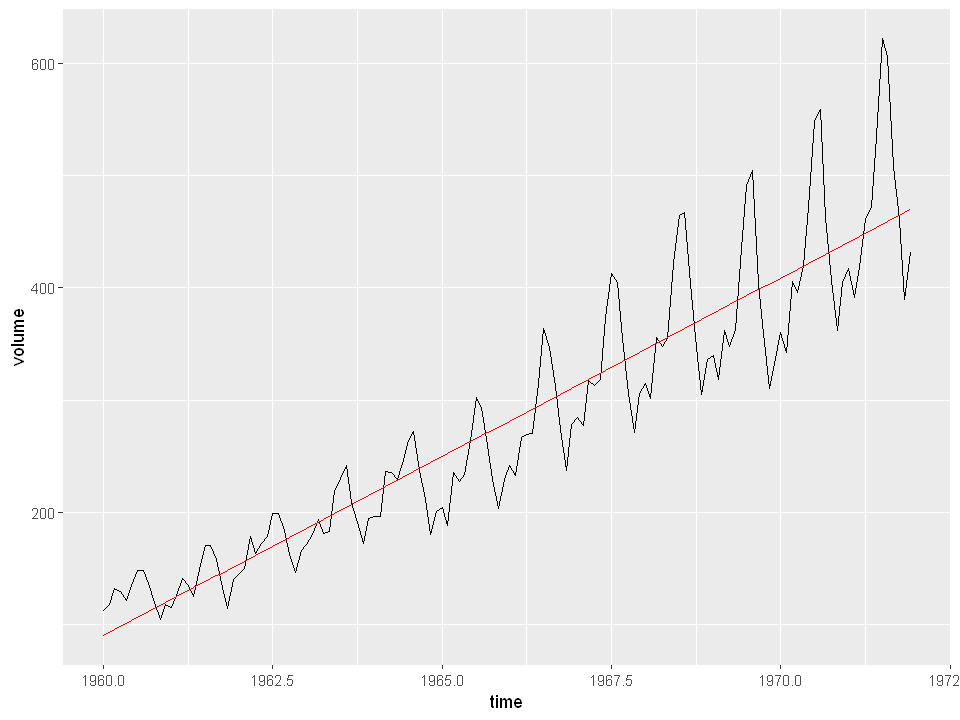

In [28]:
ggplot(airpass_df) +
    geom_line(aes(x = time, y = volume)) +
    geom_line(aes(x = time, y = 31.886*time-62406.656), color = "red")

We can also take a look at how it does wrt. the assumptions of linear regression. The first plot shows that there is clearly not equal variance. The second plot shows that the assumption of normality is violated as well (which is also clear from the histogram in the end).

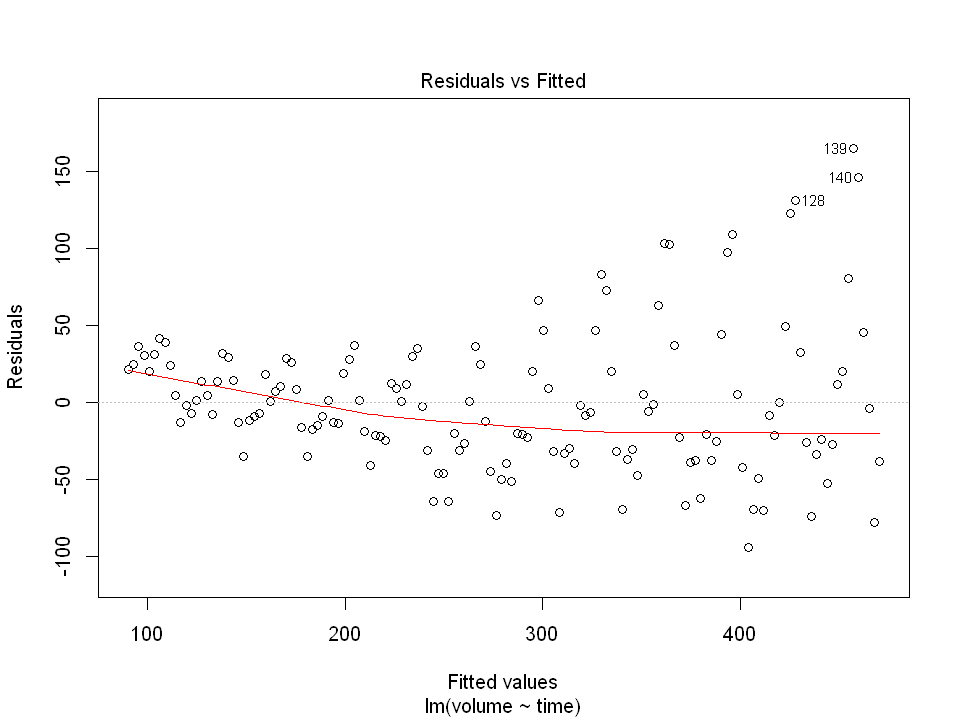

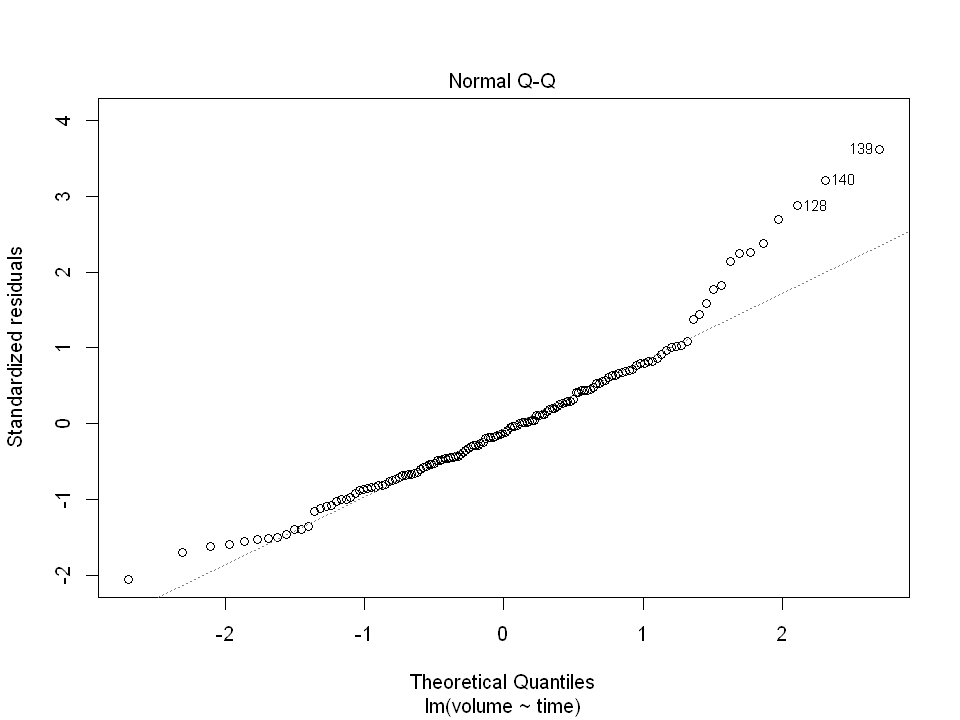

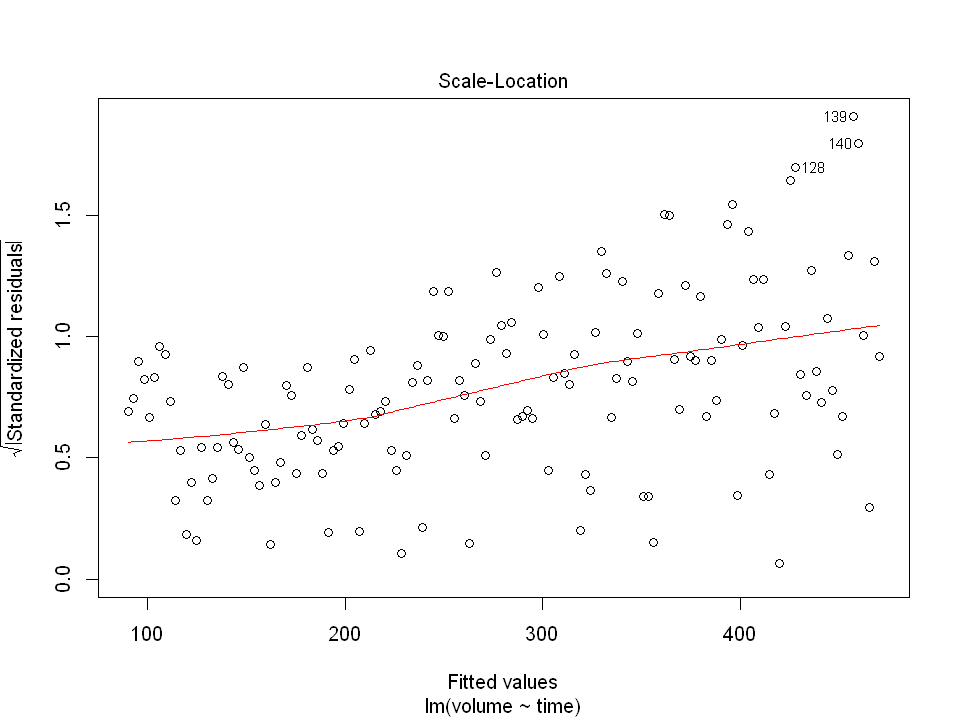

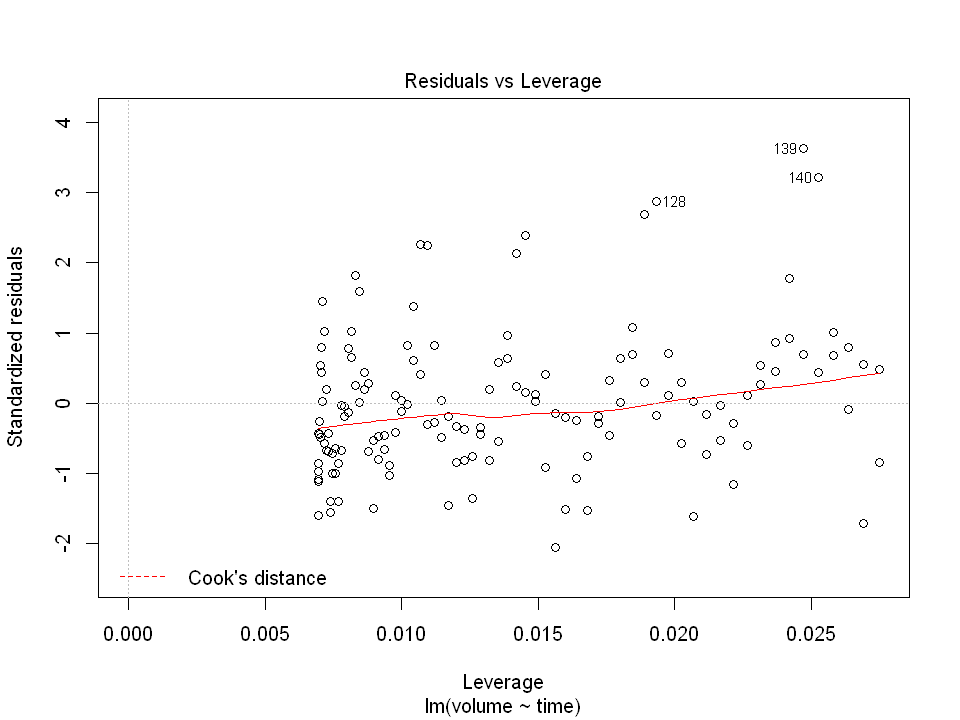

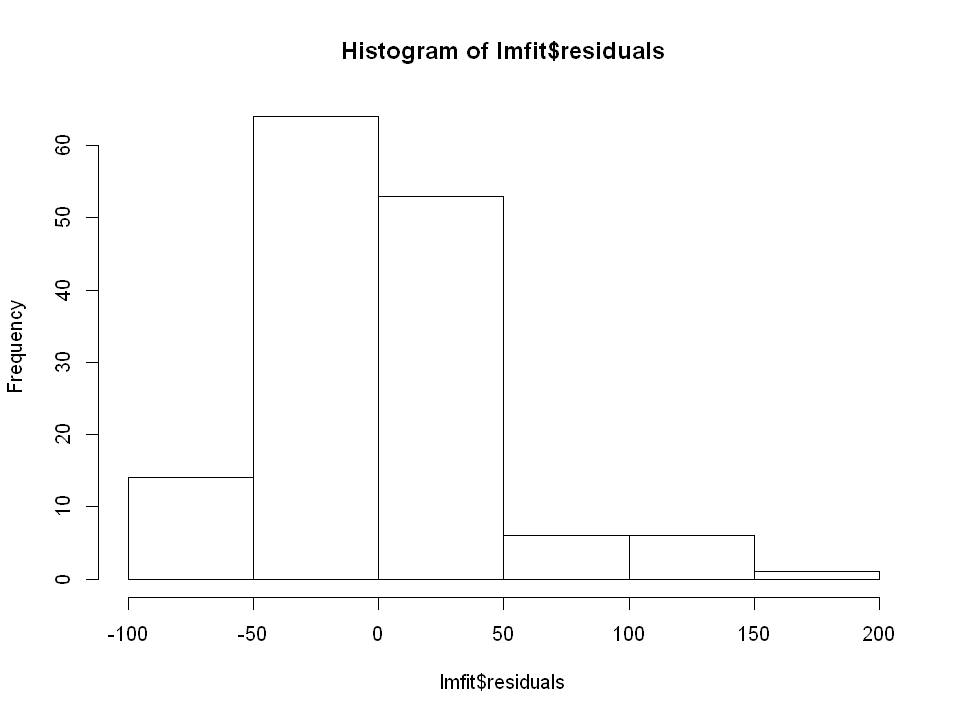

In [29]:
plot(lmfit)
hist(lmfit$residuals)

Moreover, the assumption of independence is also violated, as time series data most often has dependence between the data points in the sense that the value of one time point is never completely independent of the previous time point.

In conclusion, linear regression is not really suited for doing time series analysis and constructing models we can use to forecast the future. Note however, that linear regression can be very suited for building models of data that do have a time element, as we saw when discussing Marketing Mix Models. This needs a further elaboration.

## Time series analysis vs Linear regression: Forecasting sales vs. predicting sales

Time series analysis is about finding patterns in chronologically ordered data, as previously stated. In this sense, the pattern to be recognized is within the historical data of the time series itself. That is, we look for patterns in historical sales figures, historical Google searches, or historical number of bike riders. In this sense, we only use the variable itself to build a model.

For linear regression models, such as in Marketing Mix Modeling, we use other variables (predictor variables) to predict the variable we are interested in (response variable). For instance, we use marketing spend to predict sales, or weather, number of bikes, and number of citizens to predict the number of bike riders. In this sense, we use other variables than the one we are interested in to model and predict the variable we are interested in (sales or number of bike riders). 

### Predictions vs forecasts

Thus, when we want to predict future sales or number of bike riders using a linear regression model, we do this based on data for the predictor variables such as marketing spend or weather, number of bikes, and number of citizens. In other words  use predictor variables to predict a response variable. In the case of a time series model, we only have the response variable and we therefore only use the historical values of this response variable to predict future values of this response variable - we only use historical sales figures to predict future sales. In this case, we do not talk about prediction, but about *forecasting* instead. That is, we *forecast* with time series models and *predict* with linear regression models (and other supervised machine learning models.)

## More advanced time series analysis: decomposition and forecasting

### Decomposition

The linear regression model managed to capture the (linear) trend to a great extent, but the seasonal patterns was left out. In general, we can try to decompose a time series into: *trend*, *season* and *random noise*. The `decompose` function of R let us do just that. Thus, we can automatically do what we previously did manually by inspecting time series plot, that is, identifying trends and seasonality.

We can plot the output of a call to `decompose` to get an idea of what such a decomposition amounts to:

In [30]:
# ?decompose
decompose(airpass)

$x
     Jan Feb Mar Apr May Jun Jul Aug Sep Oct Nov Dec
1960 112 118 132 129 121 135 148 148 136 119 104 118
1961 115 126 141 135 125 149 170 170 158 133 114 140
1962 145 150 178 163 172 178 199 199 184 162 146 166
1963 171 180 193 181 183 218 230 242 209 191 172 194
1964 196 196 236 235 229 243 264 272 237 211 180 201
1965 204 188 235 227 234 264 302 293 259 229 203 229
1966 242 233 267 269 270 315 364 347 312 274 237 278
1967 284 277 317 313 318 374 413 405 355 306 271 306
1968 315 301 356 348 355 422 465 467 404 347 305 336
1969 340 318 362 348 363 435 491 505 404 359 310 337
1970 360 342 406 396 420 472 548 559 463 407 362 405
1971 417 391 419 461 472 535 622 606 508 461 390 432

$seasonal
            Jan        Feb        Mar        Apr        May        Jun
1960 -24.748737 -36.188131  -2.241162  -8.036616  -4.506313  35.402778
1961 -24.748737 -36.188131  -2.241162  -8.036616  -4.506313  35.402778
1962 -24.748737 -36.188131  -2.241162  -8.036616  -4.506313  35.402778
1963 -24.7487

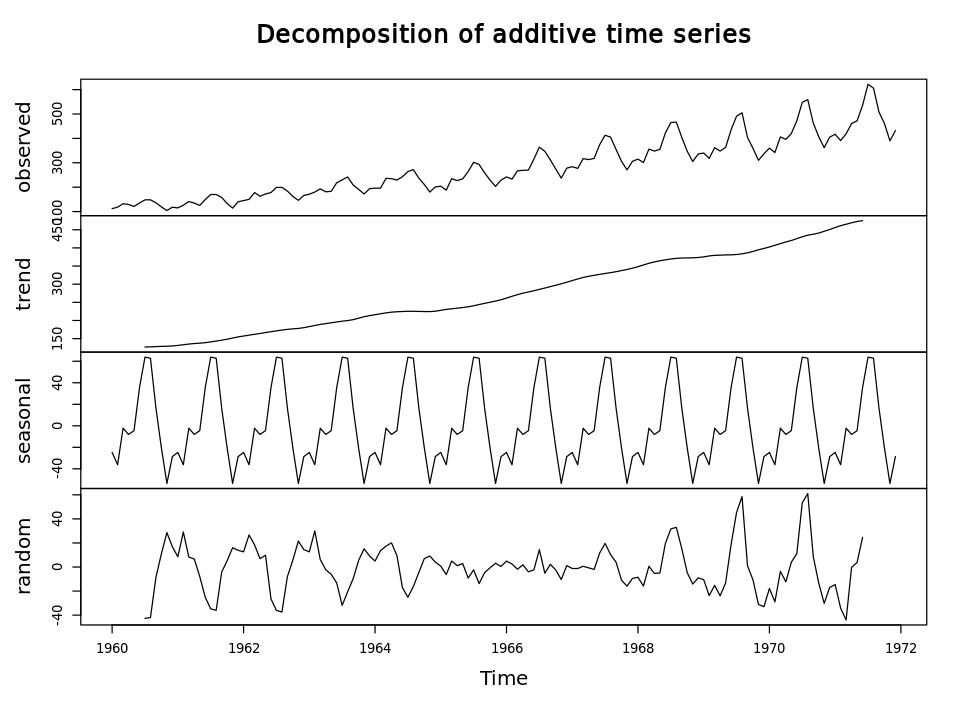

In [21]:
plot(decompose(airpass))

Here, the top graph is just the original time series. The next plot show the "trend" component, while the third graph is the seasonal component, and finally, the last graph represent additional random fluctuation. If you add the values of the three lower plots together on a given time point, you will get the value represented in the top graph.

Another and more advanced function for decomposition, preferred by some, is the `stl` function:

In [22]:
#?stl
stl(airpass, s.window = "periodic")

 Call:
 stl(x = airpass, s.window = "periodic")

Components
           seasonal    trend    remainder
Jan 1960 -25,497718 127,1873  10,31036990
Feb 1960 -35,220935 126,6495  26,57140282
Mar 1960  -3,027478 126,1117   8,91576248
Apr 1960  -8,299054 126,1989  11,10012240
May 1960  -5,737289 126,2861   0,45114078
Jun 1960  32,336634 126,7330 -24,06965722
Jul 1960  70,243882 127,1799 -49,42377968
Aug 1960  68,049433 127,4162 -47,46564918
Sep 1960  17,438326 127,6525  -9,09086079
Oct 1960 -21,063432 129,0186  11,04484245
Nov 1960 -57,481851 130,3846  31,09720711
Dec 1960 -31,740516 132,3618  17,37867988
Jan 1961 -25,497718 134,3390   6,15869051
Feb 1961 -35,220935 135,1084  26,11257707
Mar 1961  -3,027478 135,8777   8,14979039
Apr 1961  -8,299054 135,9454   7,35364819
May 1961  -5,737289 136,0131  -5,27583556
Jun 1961  32,336634 137,2093 -20,54595443
Jul 1961  70,243882 138,4055 -38,64939776
Aug 1961  68,049433 141,3114 -39,36083873
Sep 1961  17,438326 144,2173  -3,65562181
Oct 1961 -21,063

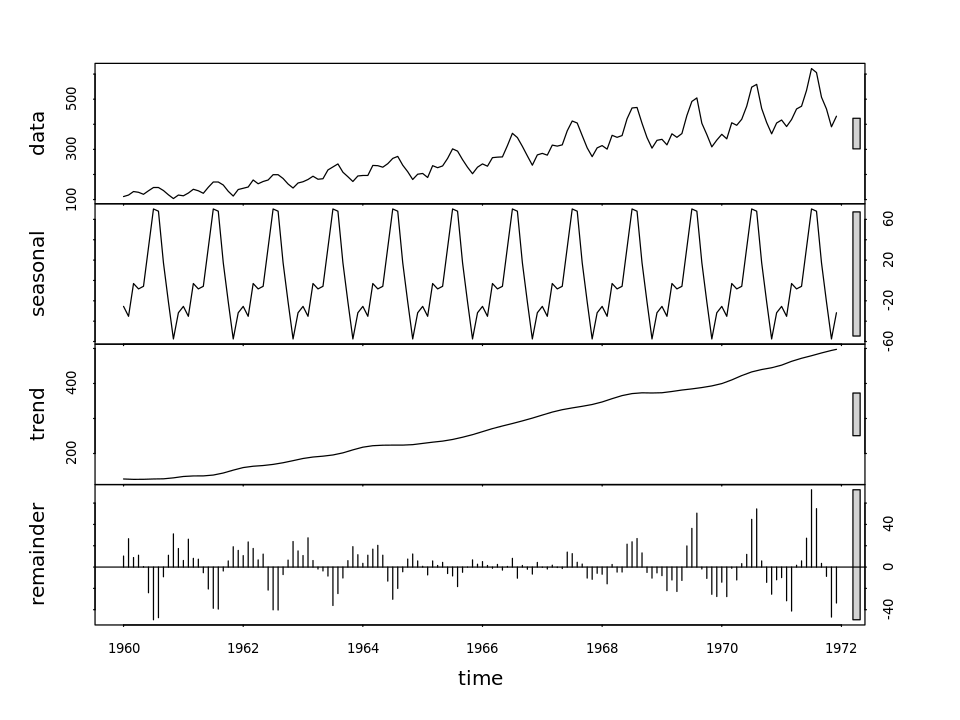

In [23]:
plot(stl(airpass, s.window = "periodic"))

### Forecasting

We will now turn to forecasting based on the historical time series data and the decomposition.

To make forecasts, we will use the `forecast` package. 

In [24]:
library(forecast)

Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 
Registered S3 methods overwritten by 'forecast':
  method             from    
  fitted.Arima       TSA     
  fitted.fracdiff    fracdiff
  plot.Arima         TSA     
  residuals.fracdiff fracdiff


We can now make a forecast based on the `stl` decomposition in the following way:

In [25]:
forecast(stl(airpass, s.window = "periodic"))

         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
Jan 1972       438,2412 416,3447 460,1376 404,7535 471,7289
Feb 1972       428,5180 397,5533 459,4826 381,1616 475,8743
Mar 1972       460,7114 422,7882 498,6346 402,7129 518,7099
Apr 1972       455,4398 411,6503 499,2294 388,4695 522,4102
May 1972       458,0016 409,0436 506,9596 383,1268 532,8764
Jun 1972       496,0755 442,4449 549,7061 414,0546 578,0964
Jul 1972       533,9828 476,0552 591,9103 445,3903 622,5753
Aug 1972       531,7883 469,8613 593,7153 437,0791 626,4975
Sep 1972       481,1772 415,4938 546,8607 380,7231 581,6314
Oct 1972       442,6755 373,4391 511,9118 336,7876 548,5633
Nov 1972       406,2570 333,6414 478,8727 295,2010 517,3131
Dec 1972       431,9984 356,1539 507,8429 316,0042 547,9925
Jan 1973       438,2412 359,2998 517,1826 317,5107 558,9716
Feb 1973       428,5180 346,5966 510,4393 303,2301 553,8058
Mar 1973       460,7114 375,9148 545,5080 331,0262 590,3966
Apr 1973       455,4398 367,8623 543,017

We can also visualize this forecast to get a better idea about it:

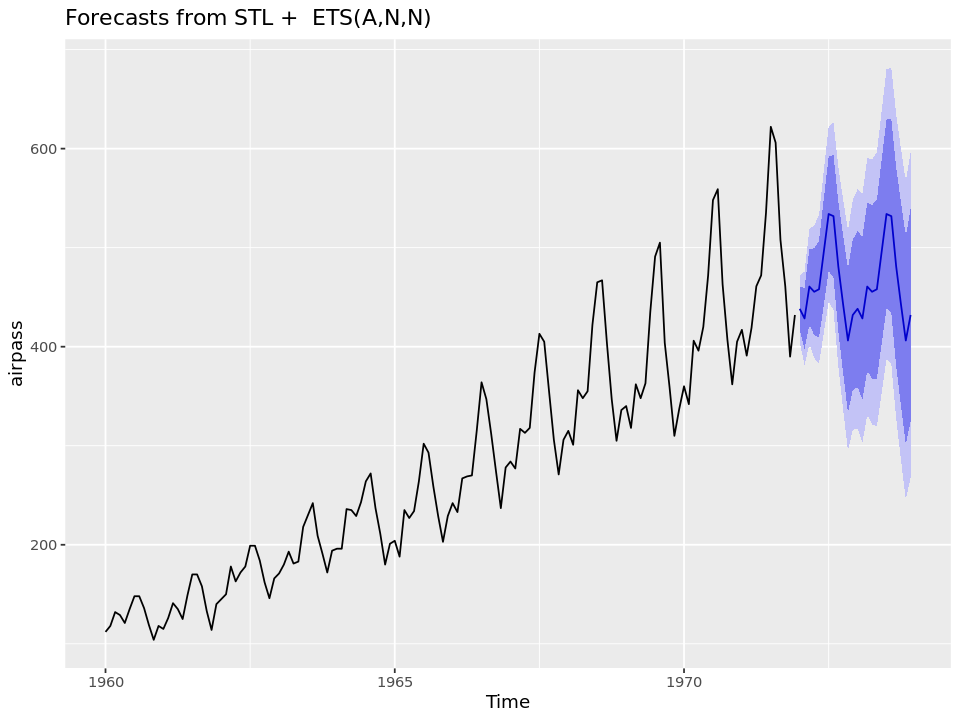

In [26]:
autoplot(forecast(stl(airpass, s.window = "periodic")))

The blue line is the forecast, while the lighter blue areas are the confidence intervals (the 80's and 95's).

The `forecast` functions also have default parameters that allow us to use it directly on a time series object such as `airpass`. This might even use more suited models than the one based on `stl`. We can just do the following:

In [27]:
forecast(airpass)

         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
Jan 1972       441,8018 419,6256 463,9780 407,8863 475,7174
Feb 1972       434,1186 407,1668 461,0704 392,8994 475,3379
Mar 1972       496,6300 460,6291 532,6310 441,5714 551,6887
Apr 1972       483,2375 443,6210 522,8539 422,6493 543,8256
May 1972       483,9914 440,0236 527,9591 416,7484 551,2343
Jun 1972       551,0244 496,3368 605,7120 467,3869 634,6619
Jul 1972       613,1797 547,3865 678,9728 512,5577 713,8016
Aug 1972       609,3648 539,2447 679,4850 502,1253 716,6044
Sep 1972       530,5408 465,4872 595,5944 431,0500 630,0317
Oct 1972       463,0332 402,8496 523,2168 370,9904 555,0761
Nov 1972       402,7478 347,4995 457,9961 318,2528 487,2428
Dec 1972       451,9694 386,7750 517,1638 352,2631 551,6756
Jan 1973       459,0139 389,6124 528,4153 352,8735 565,1542
Feb 1973       450,6333 379,4130 521,8536 341,7113 559,5553
Mar 1973       515,0797 430,1931 599,9663 385,2568 644,9026
Apr 1973       500,7700 414,8976 586,642

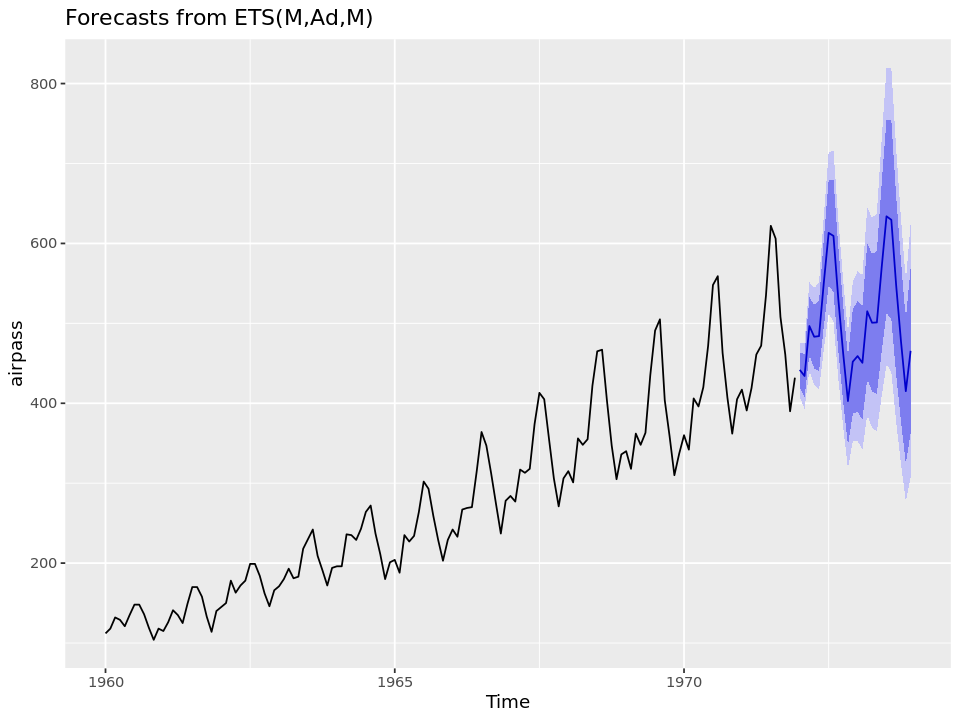

In [28]:
autoplot(forecast(airpass))

There are a lot of options with the `forecast` function. It takes knowledge of more advanced statistics to understand it well beyond the aim here, so we will leave the time series analysis for now.

### Another example

We will use the Google Trend data for the search term 'icecream' to provide another example. First we need to turn the data into a time series object. Note the special trick to deal with weekly data. For monthly data, for instance, see the documentation of the `ts` function.

In [29]:
# ?ts

In [30]:
GT_icecream_ts <- ts(GT_icecream$icecream, freq=365.25/7, start=decimal_date(ymd("2013-10-20")))
str(GT_icecream_ts)
summary(GT_icecream_ts)

 Time-Series [1:261] from 2014 to 2019: 35 30 30 30 33 33 28 30 29 28 ...


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  28,00   40,00   47,00   51,15   60,00  100,00 

We can now easily plot this time series in the following way:

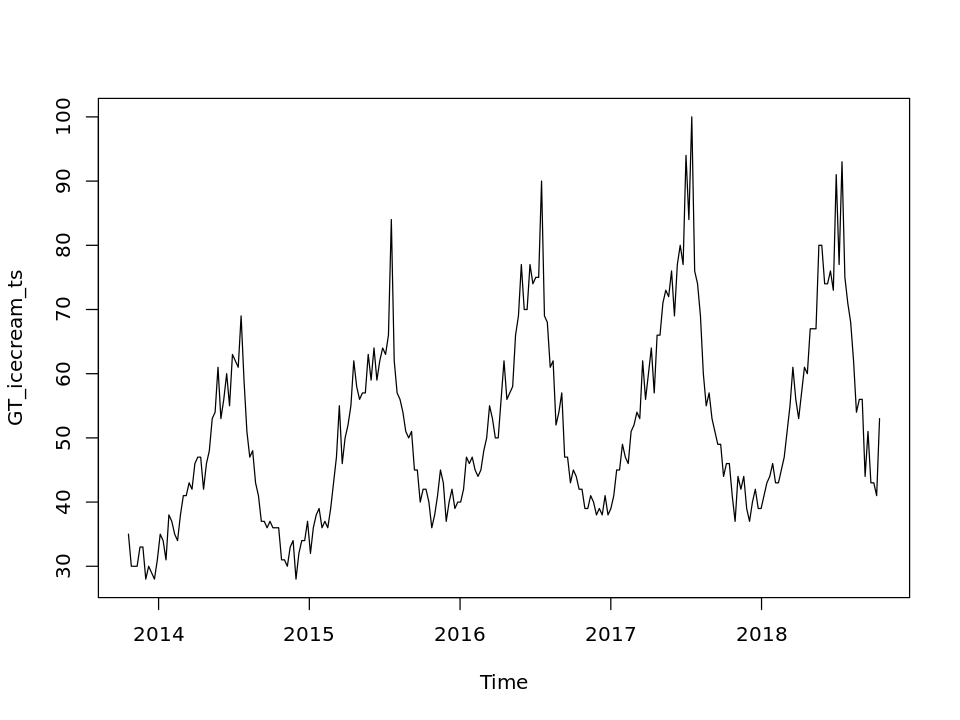

In [31]:
plot(GT_icecream_ts)

Let us try to decompose the time series now.

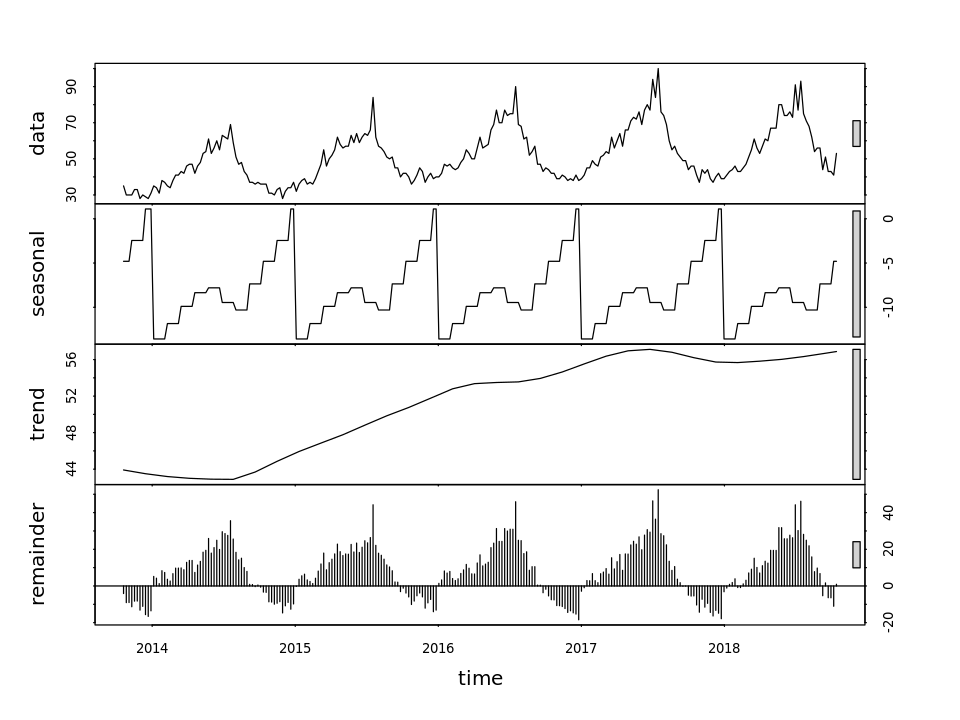

In [32]:
plot(stl(GT_icecream_ts, s.window = "periodic"))

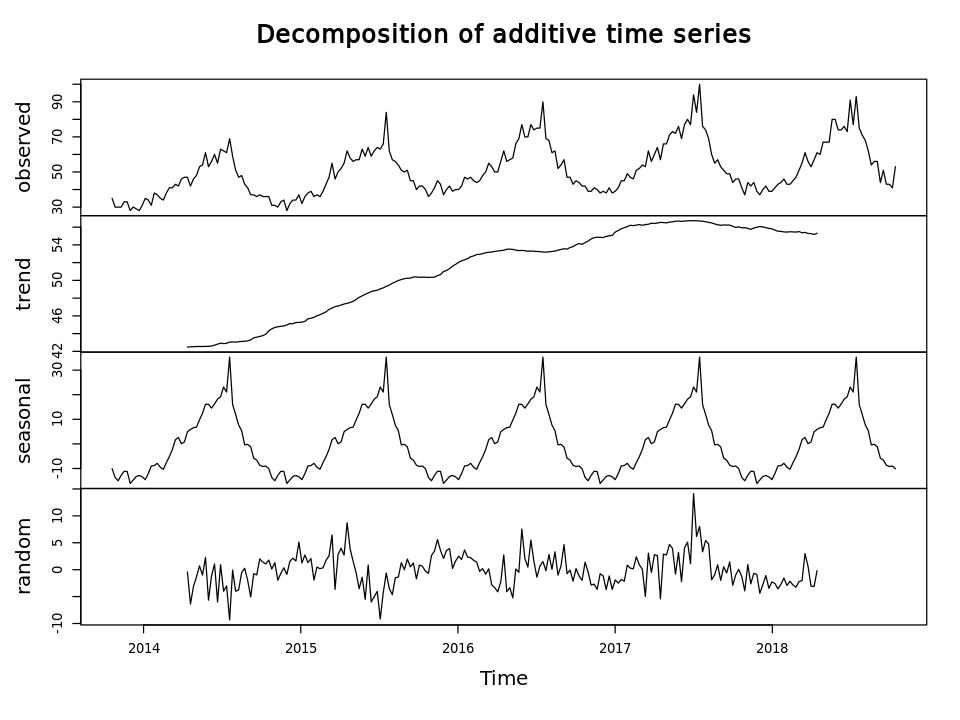

In [33]:
plot(decompose(GT_icecream_ts))

Let us try to do forecasting of the search for icecream as well:

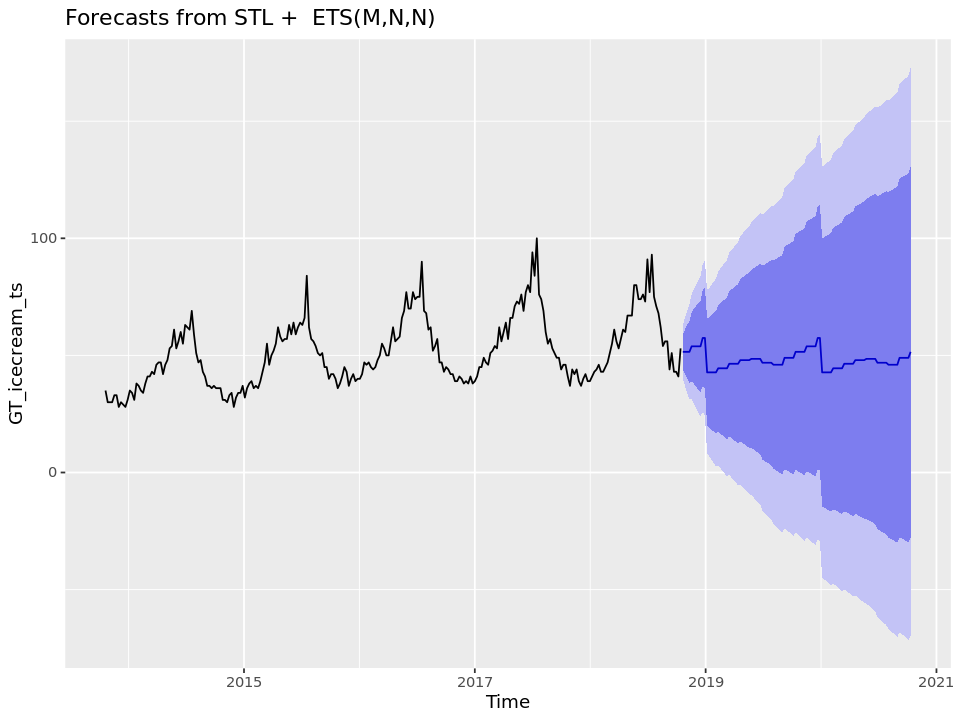

In [34]:
autoplot(forecast(stl(GT_icecream_ts, s.window = "periodic")))

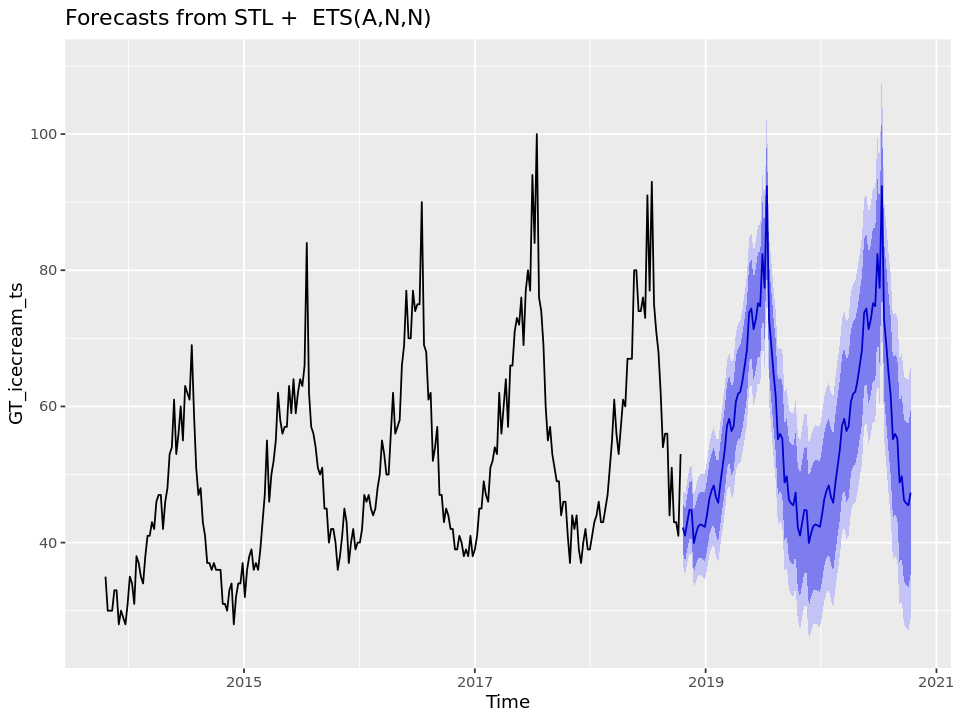

In [35]:
autoplot(forecast(GT_icecream_ts))

Here, the second forecast look most plausible. Now try it out yourself.

### Exercise

a) For the data for weekly searches in the last 5 years in the US for the search term 'AI' ("Google_Trends_ai_us_2018-10-16.csv"), which you previously loaded in and fixed:
1. Turn it into a time series object using the `ts` function
2. Decompose the time series
3. Make forecast of future searches for the term 'AI'

b) For the data for daily searches in the last 30 days in DK for the search term 'taxa' ("Google_Trend_taxa_dk_2018-10-16"), which you previously loaded in and fixed:
1. Turn it into a time series object using the `ts` function
2. Decompose the time series
3. Make forecast of future searches for the term 'taxa'

c) For the data from the book [Introduction to R for Business Intelligence](http://jgendron.github.io/com.packtpub.intro.r.bi/) by Jay Gendron, which you previously loaded in and fixed:
1. Turn it into a time series object using the `ts` function
2. Decompose the time series
3. Make forecast of future bike ridership

## Other more advanced time series models

There a multitude of other time series models out there. A popular one is the ARIMA model as described in the book [Introduction to R for Business Intelligence](http://jgendron.github.io/com.packtpub.intro.r.bi/) by Jay Gendron. See also the book [Forecasting: Principles and Practice](https://otexts.org/fpp2/) by Rob J. Hyndman and George Athanasopoulos for much more on forecasting.